In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from scipy.stats import multivariate_normal

In [166]:
def load_show_data():
    X = np.loadtxt('old_faithful.txt')
    for i in range(0,len(X)):
        X[i][1]= X[i][1]/10
    X = normalize(X)
    plt.figure(figsize=[6, 6])
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Eruptions (min)')
    plt.ylabel('Pause time (min)')
    plt.show()
    return X

In [3]:
def normalize(X):
    X_norm = np.zeros(X.shape)
    X_norm[:,0] = (X[:,0] - np.amin(X[:,0]))/(np.amax(X[:,0]) - np.amin(X[:,0]))
    X_norm[:,1] = (X[:,1] - np.amin(X[:,1]))/(np.amax(X[:,1]) - np.amin(X[:,1]))
    return X_norm

In [14]:
def gmm_log_likelihood(X, means, covs, mixing_coefs):
    
    sum2 = 0
    for i in range(X.shape[0]):
        sum1 = 0
        for k in range(mixing_coefs.shape[0]):
            sum1 += mixing_coefs[k] * multivariate_normal.pdf(X[i], mean=means[k], cov=covs[k])
        sum2 += np.log(sum1)
    log_likelihood = sum2
    
    return log_likelihood

In [9]:
def E_step(X, K, means, covariances, mix_factors):
    
    rspnblts = np.zeros((X.shape[0],K)) # responsibilities/ psoterior P(z|x;theta)
    
    for n,Xn in enumerate(X):
        evidence = 0
        a = np.zeros(K)
        for k in range(0,K):
            a[k] = mix_factors[k]*multivariate_normal.pdf(Xn, means[k,:], covariances[k,:,:]) # Likelihood * prior
            evidence = evidence + a[k]
        for i in range(0,K):
            rspnblts[n,i]= a[i]/evidence
            
    return rspnblts

In [188]:
def M_step(X, K, means, covariances, mix_factors, rspnblts):
    N = np.zeros(rspnblts.shape[1])
    for k in range(0,K):
        
        num_mean = 0
        N[k] = rspnblts[:,k].sum(axis=0)
        
        for n in range(0,X.shape[0]):
            num_mean = num_mean + rspnblts[n,k]*X[n]
            
        means[k] = num_mean/N[k]
        
        num_cov = 0
        for n in range(0,X.shape[0]):
            x_minus_avg = X[n] - means[k]
            num_cov = num_cov + rspnblts[n,k] * np.outer(x_minus_avg, np.transpose(x_minus_avg))
            
        covariances[k] = num_cov/N[k]
        
    mix_factors = N / N.sum(axis=0)
    
    return means, covariances, mix_factors

In [229]:
from scipy.stats import multivariate_normal as plt_gaussian
from matplotlib import cm
def plot_gmm_2d(X, K, responsibilities, means, covs, mixing_coefs):
    
    x = np.linspace(0,1,50)
    y = np.linspace(0,1,50)
    X,Y = np.meshgrid(x,y)

    pos = np.array([X.flatten(),Y.flatten()]).T



    rv0 = multivariate_normal(means[0], covs[0])
    rv1 = multivariate_normal(means[1], covs[1])

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    ax.plot_surface(X, Y, rv0.pdf(pos),cmap='viridis',linewidth=0)
    ax.plot_surface(X, Y, rv1.pdf(pos),cmap=cm.coolwarm,linewidth=0)

In [230]:
def main():
    X = load_show_data()
    K=2
    mix_factors = np.array([0.8, 0.2])
    means = np.array([[0.1, 0.6], [0.8, 0.4]])
    covariances = np.array([0.5 * np.eye(2), 0.5 * np.eye(2)])
    
    for i in range(0,25):
        rspnblts = E_step(X, K, means, covariances, mix_factors)
        plot_gmm_2d(X, K, rspnblts, means, covariances, mix_factors)
        print(gmm_log_likelihood(X, means, covariances, mix_factors))
        means, covariances, mix_factors = M_step(X, K, means, covariances, mix_factors, rspnblts)

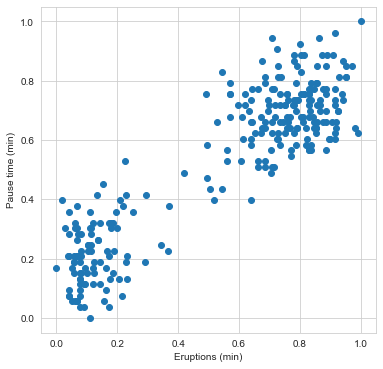

-402.4340901935953
131.5742946758455
132.22889688767458
133.7719720139147
138.34628070147346
154.52656694058854
189.6625576897291
209.307427434294
217.7066882941812
222.83673988375344
227.61705089382966
233.4036755278847
241.82858283983768
254.0156526671759
268.62421100437905
280.9468245803052
289.18648260263285
290.3667916728589
290.40507676256163
290.4068626483997


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


290.4069617007565
290.40696738337476
290.4069677119674
290.40696773100444
290.4069677321076


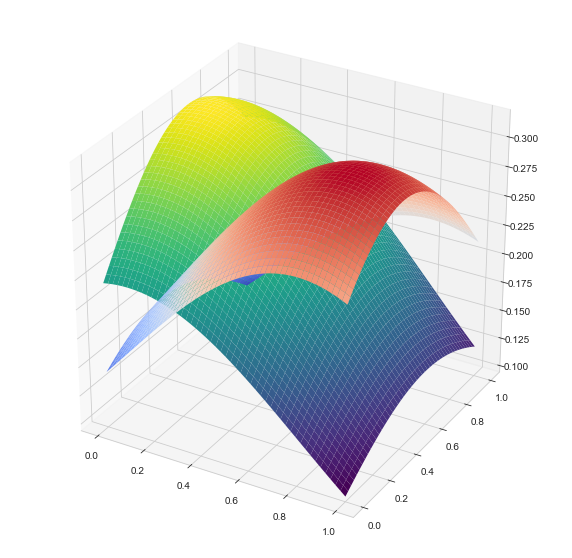

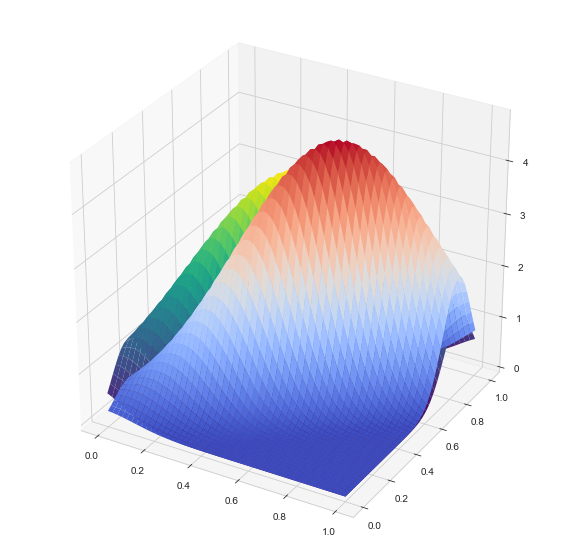

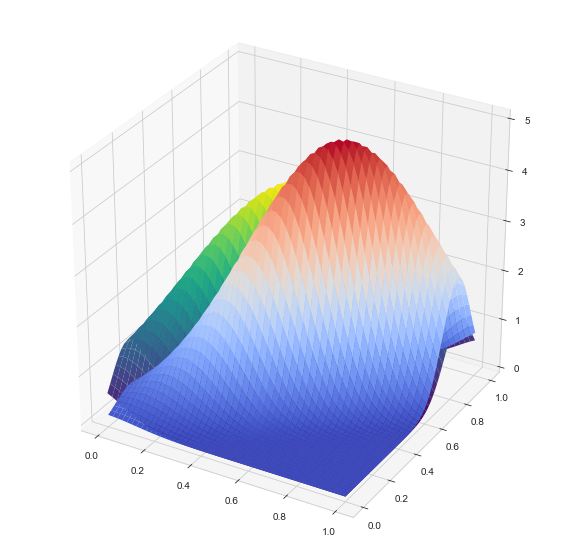

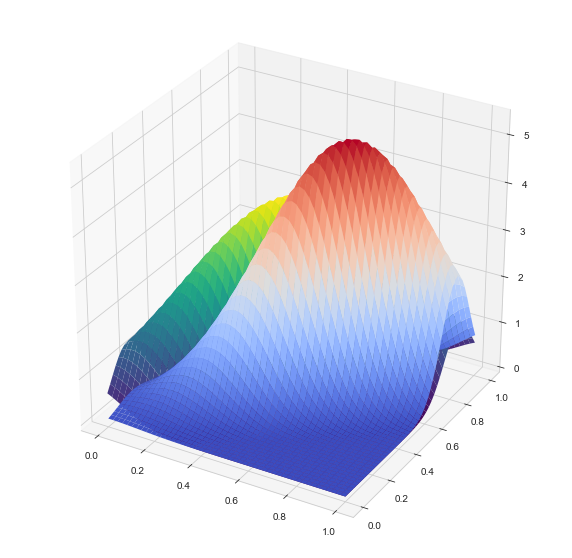

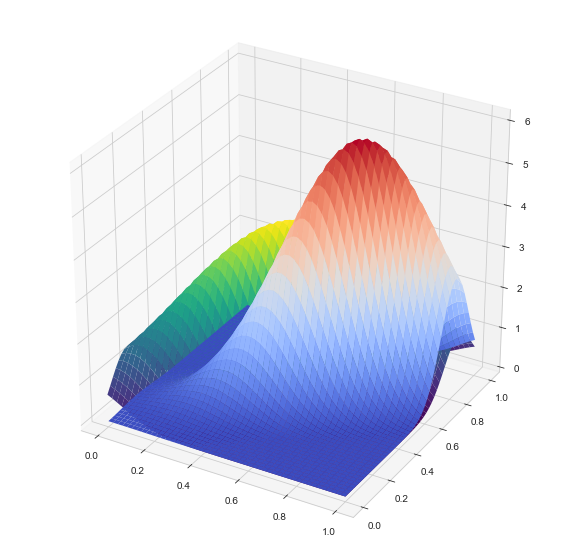

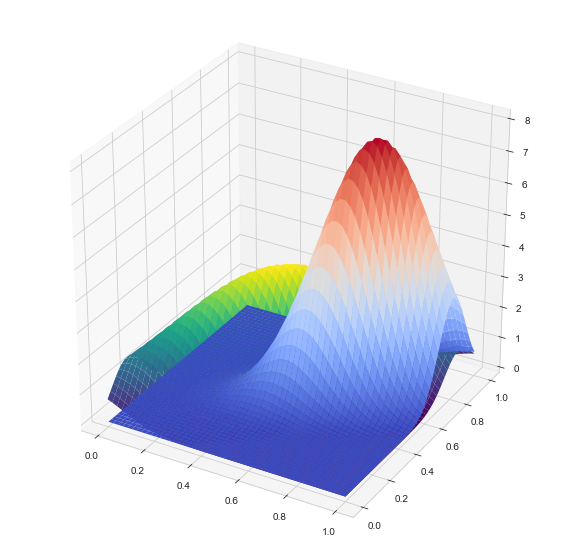

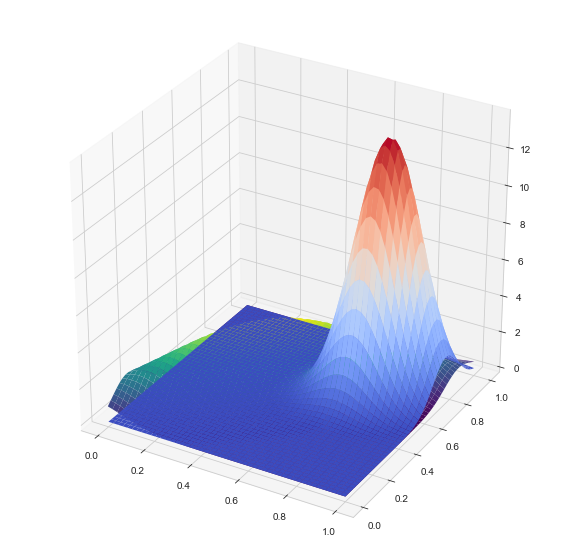

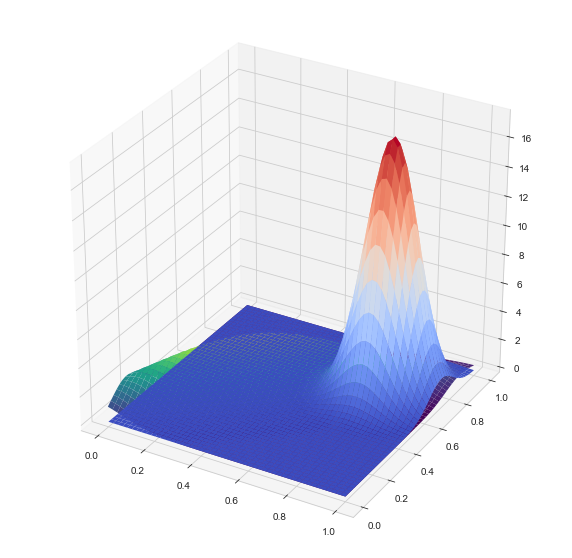

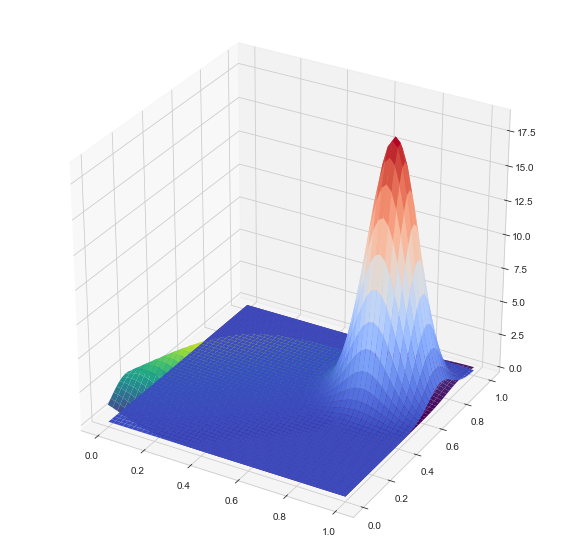

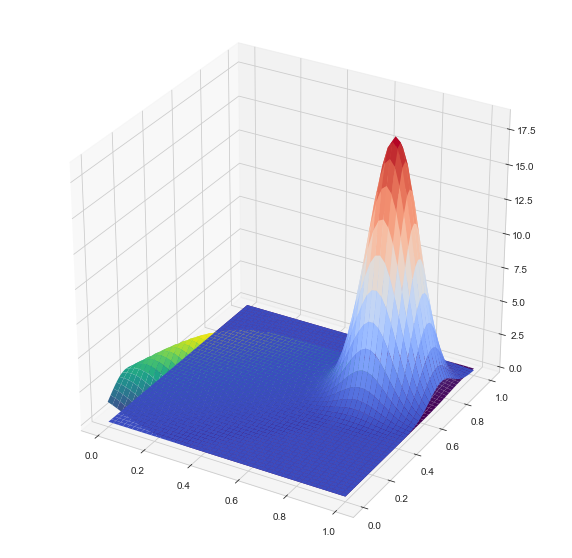

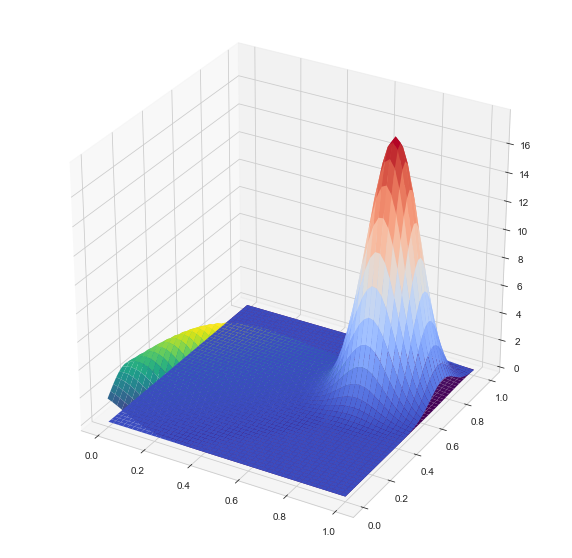

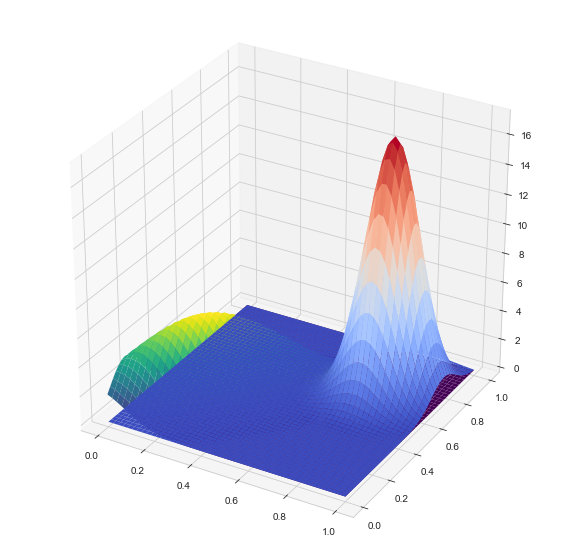

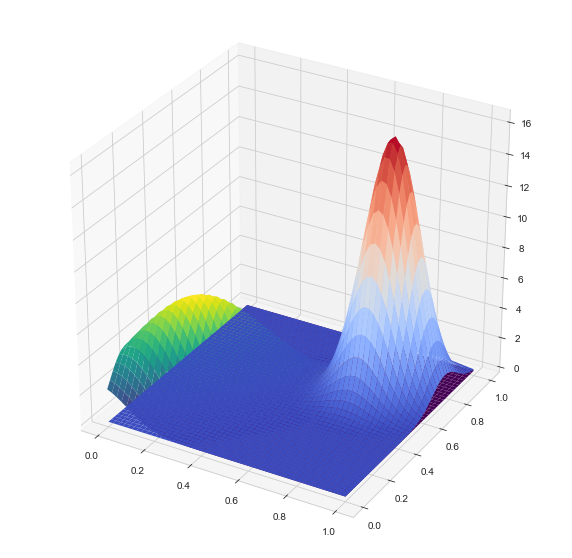

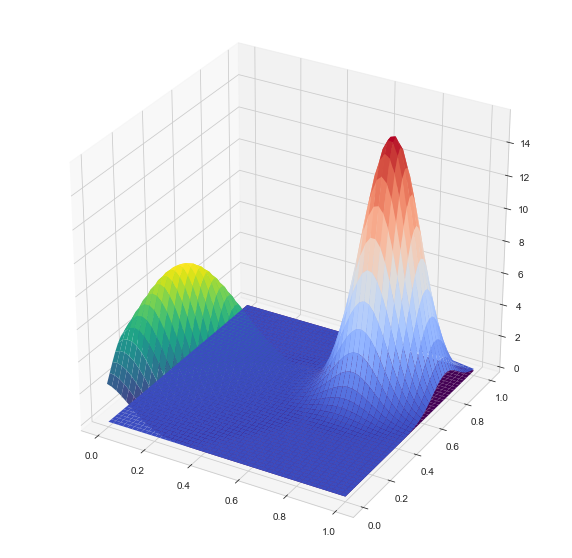

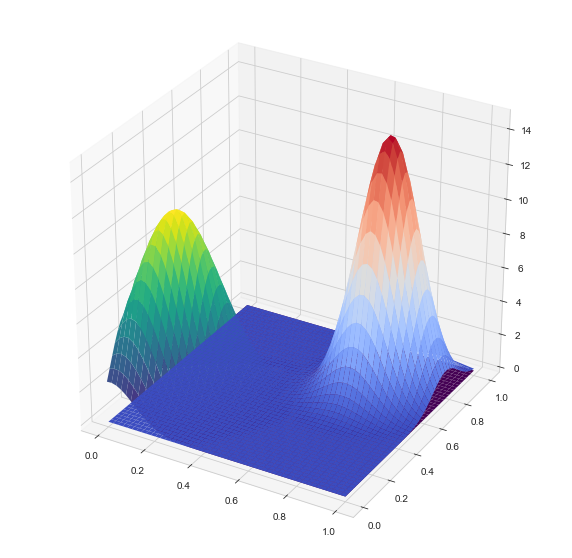

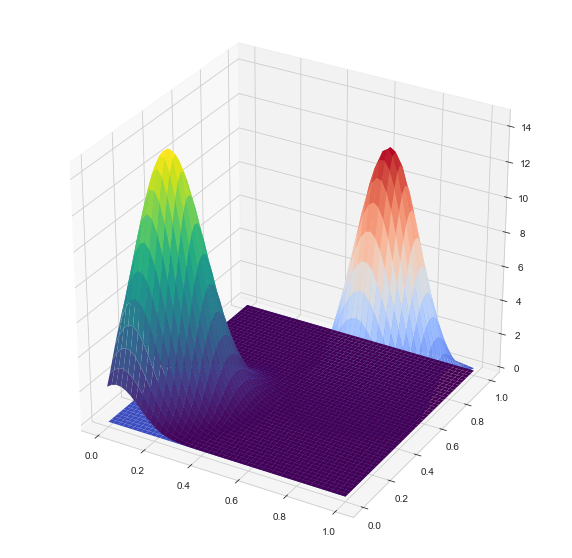

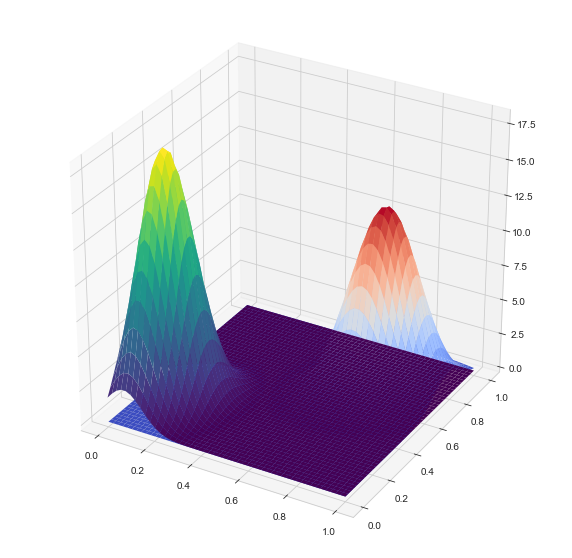

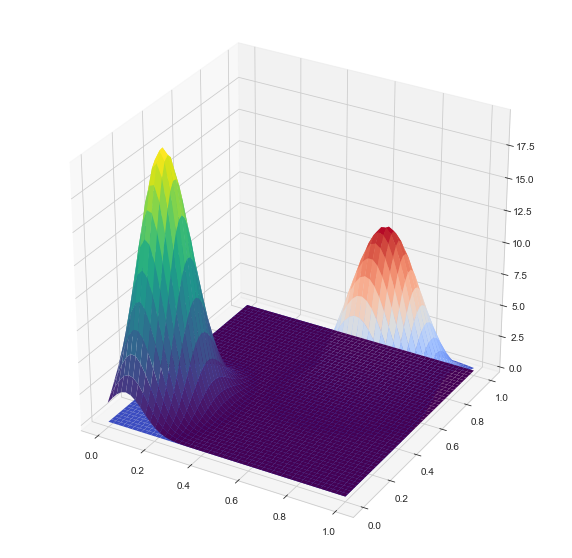

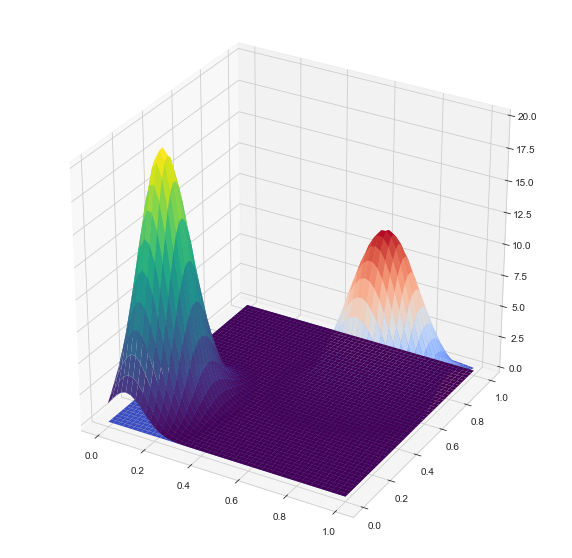

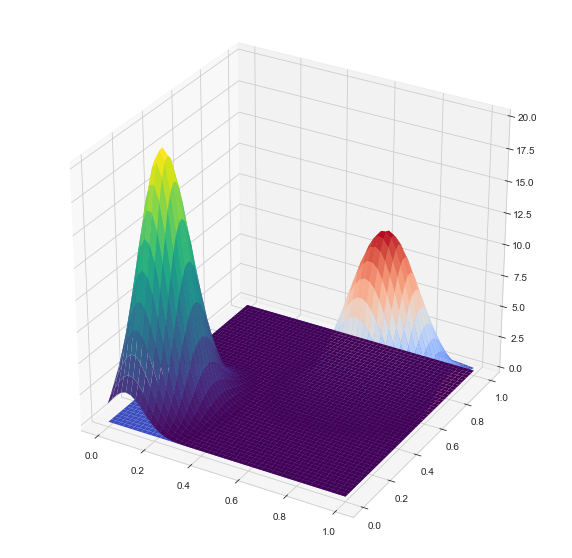

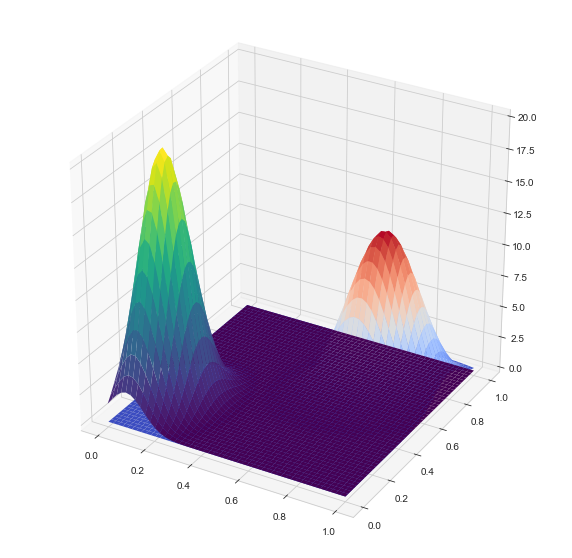

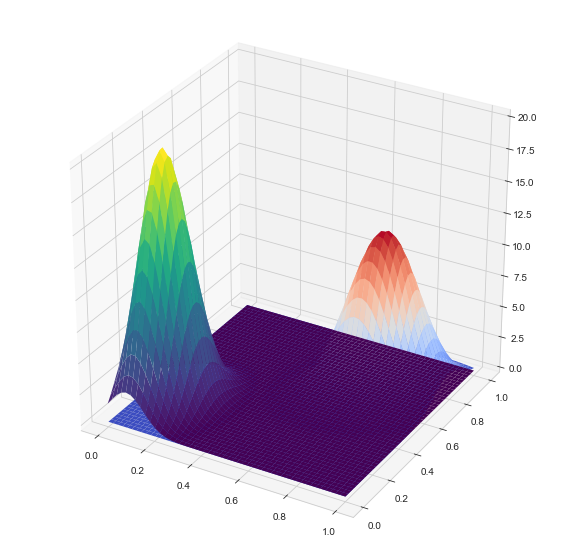

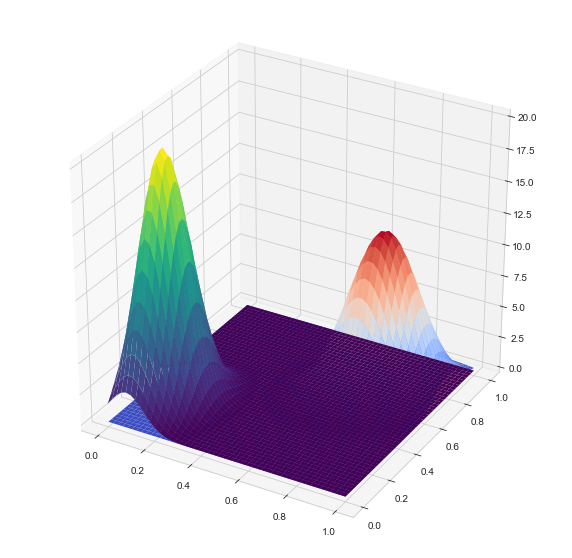

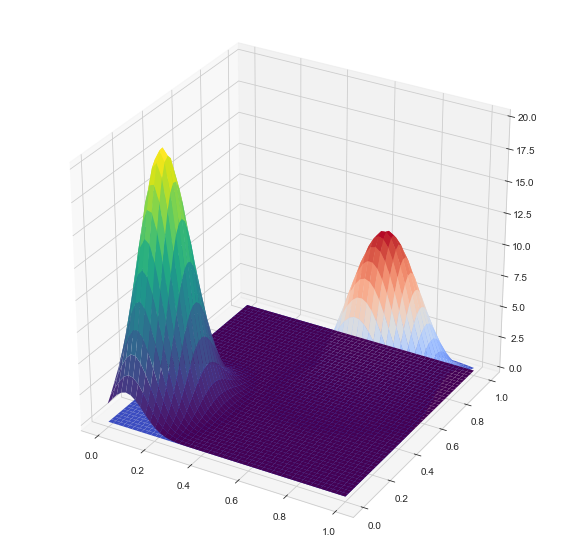

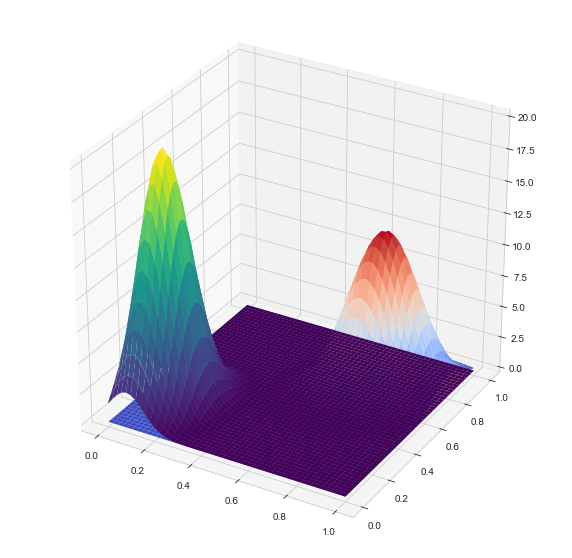

In [231]:
if __name__ == "__main__":
    main()